# Import Module

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")


# Data Ingestion

In [3]:
mnist = tf.keras.datasets.mnist

# Split Data

In [4]:
(X_train_full, y_train_full), (X_test, y_test)= mnist.load_data()

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255


# Model Definition

In [ ]:
CLASSES = len(np.unique(y_train))

LAYERS = [
    tf.keras.layers.Flatten(input_shape= (28,28), name="InputLayer"),
    tf.keras.layers.Dense(300, activation='relu', name="HiddenLayer1"),
    tf.keras.layers.Dense(100, activation='relu', name='HiddenLayer2'),
    tf.keras.layers.Dense(CLASSES, activation='softmax', name='OutputLayer')
]

model_clf = tf.keras.Sequential(LAYERS)
model_clf.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Compilation

In [6]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZERS = 'SGD'
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

# Model Training

In [ ]:
EPOCHS = 1

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=32,
    validation_data=VALIDATION
)

1719/1719 [==============================] - 14s 7ms/step - loss: 0.6023 - accuracy: 0.8441 - val_loss: 0.3077 - val_accuracy: 0.9168


# Model Evaluation

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3088 - accuracy: 0.9132


[0.3087964951992035, 0.9132000207901001]

# Model Save

In [9]:
model_clf.save("mnist.h5")

# Model Inferencing

1/1 [==============================] - 0s 167ms/step


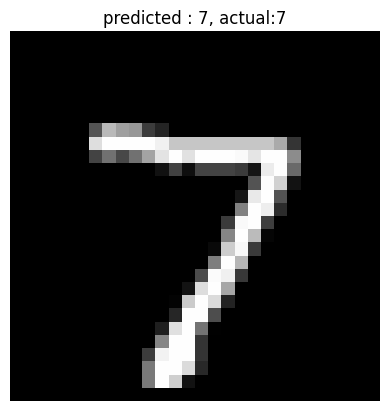

********************


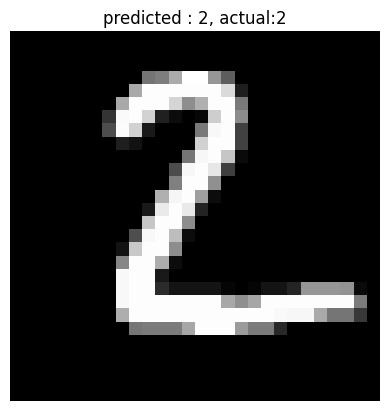

********************


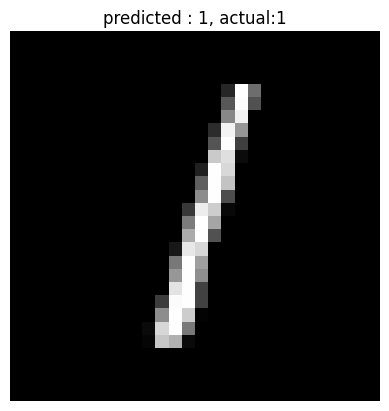

********************


In [23]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
Y_pred = np.argmax(y_prob, axis=-1)

for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap='gray')
    plt.title(f"predicted : {pred}, actual:{actual}")
    plt.axis("off")
    plt.show()
    print("*"*20)
             
